# Imports And Consts

In [2]:
RESULTS_COLUMNS = [
    "score",
    "numberOfTruePositives",
    "accuracy",
    "precision",
    "numberOfFeatures",
    "model",
    "model_parameters",
    "feature_selector",
    "selector_parameters",
]

In [3]:
import functions
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.feature_selection import f_classif, mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import xgboost as xgb

# Load Data

load the training and test data in a format specified by task description

In [4]:
with open("./Dataset/x_test.txt") as file:
    X_test = [[float(digit) for digit in line.split()] for line in file]


with open("./Dataset/x_train.txt") as file:
    X_train = [[float(digit) for digit in line.split()] for line in file]


with open("./Dataset/y_train.txt") as file:
    y_train = [[float(digit) for digit in line.split()] for line in file]

In the X_test there are 500 features and 5000 observations, y_train contains 5000 values, X_train contains 500 features and 5000 observations

In [5]:
print("X_test datapoints:", len(X_test), " features:", len(X_test[0]))
print("X_train datapoints:", len(X_train), " features:", len(X_train[0]))
print("y_train datapoints:", len(y_train))

X_test datapoints: 5000  features: 500
X_train datapoints: 5000  features: 500
y_train datapoints: 5000


# XGBoost

# TODO: Add this to functions, create some param arrays and run some tests

In [17]:
y_train_ravel = np.ravel(y_train, order="C")
y_train_ravel = y_train_ravel.astype(int)

In [37]:
from sklearn.model_selection import train_test_split

selector = functions.SelectKBest(k=2)

X_new = selector.fit_transform(X_train,y_train_ravel)
X_new = functions.RobustScaler().fit_transform(X_new,y_train_ravel)
X_t,X_te,y_t,y_te = train_test_split(X_new,y_train_ravel,random_state=42, test_size=0.33)

In [65]:
dtrain = xgb.DMatrix(X_t, label=y_t)
param = {'max_depth': 2, 'eta': 0.001, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
num_round = 10
clf = xgb.XGBClassifier()
clf.set_params(**param)
bst = clf.fit(X_t,y_t)

In [66]:
dtest = xgb.DMatrix(X_te)
ypred= clf.predict_proba(X_te)

In [67]:
functions.getScoreLimited(y_te,ypred,len(X_new[0]),0.45)

(199, 0.48623853211009177)

# Batch 1

## Consts

In [ ]:
RESULTS_FILENAME = "./Results/Limited/XGBoost/results-11"

## Experiment

### Parameters

In [ ]:
# HistGradientBoostingClassifier
learning_rate = [0.1, 0.01]
max_depth = [2, 3, 5, None]
random_state = [42]
max_features = [3, 5, 8, 1.0]
l2_regularization = [0, 0.5, 0.8]
histGradientBoostingParameters = functions.generateParameters(
    [learning_rate, max_depth, random_state, max_features, l2_regularization], globals()
)

# LDA
solver = ["svd", "lsqr"]
shrinkage = [None, "auto"]
n_components = [3, 5, 8, None]
ldaParameters = functions.generateParameters(
    [solver, shrinkage, n_components], globals()
)


# QDA
reg_param = [0, 0.3, 0.5, 0.8]
qdaParameters = functions.generateParameters([reg_param], globals())

# KNN
n_neighbors = [3, 5, 8]
weights = ["uniform", "distance"]
p = [1, 2]
leaf_size = [15, 30, 50]
knnParameters = functions.generateParameters(
    [n_neighbors, weights, p, leaf_size], globals()
)

# SVM
C = [0.5, 1.0, 1.5]
kernel = ["linear", "rbf", "sigmoid", "poly"]
svcParameters = functions.generateParameters([C, kernel], globals())

# GradientBoostingClassifier
loss = ["exponential"]
learning_rate = [ 0.001]
n_estimators = [800]
min_samples_split = [2]
min_samples_leaf = [5, 7]
subsample = [1.0]
max_depth = [5, 8 ]
min_impurity_decrease = [1]
random_state = [42]
max_features = [None]
ccp_alpha = [0]
gradientBoostingParameters = functions.generateParameters(
    [
        loss,
        learning_rate,
        n_estimators,
        subsample,
        max_depth,
        random_state,
        max_features,
        ccp_alpha,
        min_samples_split,
        min_samples_leaf,
        min_impurity_decrease,
    ],
    globals(),
)


# MLPClassifier

activation = ["relu", "tanh"]
solver = [ "adam"]
alpha = [ 0.01]
learning_rate = [ "adaptive"]
learning_rate_init = [0.01, 0.001]
hidden_layer_sizes = [(100,), (200,), (400,)]
max_iter = [1600]
random_state = [42]
mlpClassifierParameters = functions.generateParameters(
    [
        activation,
        solver,
        alpha,
        learning_rate,
        learning_rate_init,
        hidden_layer_sizes,
        max_iter,
        random_state,
    ],
    globals()
)
# Voting?
estimators = [
    [
        (
            "1",
            functions.GradientBoostingClassifier(
                loss="exponential",
                learning_rate=0.01,
                n_estimators=200,
                random_state=42,
            ),
        ),
        ("2", functions.MLPClassifier(max_iter=800, random_state=42)),
        ("3", functions.QuadraticDiscriminantAnalysis()),
    ]
]
voting = ["soft"]

votingParameters = functions.generateParameters([estimators, voting], globals())

# AdaBoost


estimator = [functions.GradientBoostingClassifier(
                loss="exponential",
                learning_rate=0.001,
                n_estimators=800,
                random_state=42,
            )]
estimator = [functions.QuadraticDiscriminantAnalysis()]
n_estimators = [50]
learning_rate = [0.5, 0.1]
random_state = [42]

adaBoostParameters = functions.generateParameters(
    [estimator, n_estimators, learning_rate, random_state], globals()
)

# XGBOOST
max_depth = [2,3]
eta= [0.001,0.0001,0.01]
objective = ['binary:logistic']
nthread=[4,2,8]
eval_metric = ['auc']

xGBoostParameters = functions.generateParameters([max_depth,eta,objective,nthread,eval_metric],globals())


models = [
    # {"model": functions.ModelType.LDA, "parameters": ldaParameters},
    # {"model": functions.ModelType.QDA, "parameters": qdaParameters},
    # {"model": functions.ModelType.KNN, "parameters": knnParameters},
    # {"model": functions.ModelType.SVC, "parameters": svcParameters},
    # {
      #  "model": functions.ModelType.GradientBoosting,
      #  "parameters": gradientBoostingParameters,
    # },
    # {
    #     "model": functions.ModelType.HistGradientBoosting,
    #     "parameters": histGradientBoostingParameters,
    # },
    {"model": functions.ModelType.MLPClassifier, "parameters": mlpClassifierParameters},
    {"model": functions.ModelType.ADABoost, "parameters": adaBoostParameters},
    # {"model": functions.ModelType.Voting, "parameters": votingParameters},
    {"model": functions.ModelType.XGBoost, "parameters": xGBoostParameters},
]

In [ ]:
# KBest
k = [2, 3]
score_func = [mutual_info_classif]
kBestParameters = functions.generateParameters([score_func, k], globals())

# FPR

# mutual_info_classif seems to break for FPR but maybe try to run these without StandardScaler?
score_func = [f_classif]
alpha = [0.01]
fprParameters = functions.generateParameters([score_func, alpha], globals())


# RFE
estimator = [SVC(kernel="linear")]
n_features_to_select = [2, 3]
step = [0.9]
rfeParameters = functions.generateParameters(
    [estimator, n_features_to_select, step], globals()
)


featureSelectors = [
    {"model": functions.FeatureSelectorType.KBest, "parameters": kBestParameters},
    {"model": functions.FeatureSelectorType.FPR, "parameters": fprParameters},
    {"model": functions.FeatureSelectorType.RFE, "parameters": rfeParameters},
]

In [ ]:
scalers = [
    {"model": functions.Scaler.NoScaling, "parameters": [{}]},
    {"model": functions.Scaler.Standard, "parameters": [{}]},
    {"model": functions.Scaler.Robust, "parameters": [{}]},
]

degree = [2]

polynomialParameters = functions.generateParameters([degree], globals())

featureGenerators = [
    {"model": functions.FeatureGenerator.NoFeatureGeneration, "parameters": [{}]},
    {
        "model": functions.FeatureGenerator.Polynomial,
        "parameters": polynomialParameters,
    },
]

### Conducting the experiment

In [ ]:
y_train_ravel = np.ravel(y_train, order="C")
y_train_ravel = y_train_ravel.astype(int)

In [ ]:
%%time
results = functions.conductExperimentsWithScalersAndGenerators(
    models=models,
    featureSelectors=featureSelectors,  qwerioup][\]
    X_orig=X_train,
    y_orig=y_train_ravel,
    scalers=scalers,
    featureGenerators=featureGenerators,
    getLimitedScore=True,
    limit=0.45,

)
with open(RESULTS_FILENAME, "wb") as f:
    pickle.dump(results, f)

Performed Experiment 1/32(approx) took (s): model: 8.06 selector 16.44 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001FD41F5DB20>, 'k': 2} ModelType.GradientBoosting {'loss': 'exponential', 'learning_rate': 0.001, 'n_estimators': 800, 'subsample': 1.0, 'max_depth': 5, 'random_state': 42, 'max_features': None, 'ccp_alpha': 0, 'min_samples_split': 2, 'min_samples_leaf': 5, 'min_impurity_decrease': 1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 2/32(approx) took (s): model: 7.42 selector 16.44 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001FD41F5DB20>, 'k': 2} ModelType.GradientBoosting {'loss': 'exponential', 'learning_rate': 0.001, 'n_estimators': 800, 'subsample': 1.0, 'max_depth': 5, 'random_state': 42, 'max_features': None, 'ccp_alpha': 0, 'min_samples_split': 2, 'min_samples_leaf': 7, 'min_impurity_decrease': 1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Documents\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performed Experiment 13/32(approx) took (s): model: 203.98 selector 16.44 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001FD41F5DB20>, 'k': 2} ModelType.ADABoost {'estimator': GradientBoostingClassifier(learning_rate=0.01, loss='exponential',
                           n_estimators=800, random_state=42), 'n_estimators': 50, 'learning_rate': 1, 'random_state': 42} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Documents\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performed Experiment 14/32(approx) took (s): model: 204.18 selector 16.44 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001FD41F5DB20>, 'k': 2} ModelType.ADABoost {'estimator': GradientBoostingClassifier(learning_rate=0.01, loss='exponential',
                           n_estimators=800, random_state=42), 'n_estimators': 50, 'learning_rate': 0.5, 'random_state': 42} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Documents\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performed Experiment 15/32(approx) took (s): model: 203.53 selector 16.44 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001FD41F5DB20>, 'k': 2} ModelType.ADABoost {'estimator': GradientBoostingClassifier(learning_rate=0.01, loss='exponential',
                           n_estimators=800, random_state=42), 'n_estimators': 50, 'learning_rate': 0.1, 'random_state': 42} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 16/32(approx) took (s): model: 1.78 selector 16.44 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001FD41F5DB20>, 'k': 2} ModelType.Voting {'estimators': [('1', GradientBoostingClassifier(learning_rate=0.01, loss='exponential',
                           n_estimators=200, random_state=42)), ('2', MLPClassifier(max_iter=800, random_state=42)), ('3', QuadraticDiscriminantAnalysis())], 'voting': 'soft'} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Exper

c:\Users\Patryk\Documents\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performed Experiment 29/32(approx) took (s): model: 263.3 selector 14.83 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001FD41F5DB20>, 'k': 3} ModelType.ADABoost {'estimator': GradientBoostingClassifier(learning_rate=0.01, loss='exponential',
                           n_estimators=800, random_state=42), 'n_estimators': 50, 'learning_rate': 1, 'random_state': 42} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Documents\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performed Experiment 30/32(approx) took (s): model: 258.03 selector 14.83 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001FD41F5DB20>, 'k': 3} ModelType.ADABoost {'estimator': GradientBoostingClassifier(learning_rate=0.01, loss='exponential',
                           n_estimators=800, random_state=42), 'n_estimators': 50, 'learning_rate': 0.5, 'random_state': 42} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Documents\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performed Experiment 31/32(approx) took (s): model: 250.77 selector 14.83 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001FD41F5DB20>, 'k': 3} ModelType.ADABoost {'estimator': GradientBoostingClassifier(learning_rate=0.01, loss='exponential',
                           n_estimators=800, random_state=42), 'n_estimators': 50, 'learning_rate': 0.1, 'random_state': 42} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 32/32(approx) took (s): model: 3.02 selector 14.83 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000001FD41F5DB20>, 'k': 3} ModelType.Voting {'estimators': [('1', GradientBoostingClassifier(learning_rate=0.01, loss='exponential',
                           n_estimators=200, random_state=42)), ('2', MLPClassifier(max_iter=800, random_state=42)), ('3', QuadraticDiscriminantAnalysis())], 'voting': 'soft'} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
CPU times: tota

## Results

In [ ]:
with open(RESULTS_FILENAME, "rb") as input_file:
    results = pickle.load(input_file)

In [ ]:
resultsDf = pd.DataFrame(
    results,
    columns=functions.RESULTS_COLUMNS,
)

### Detailed Results

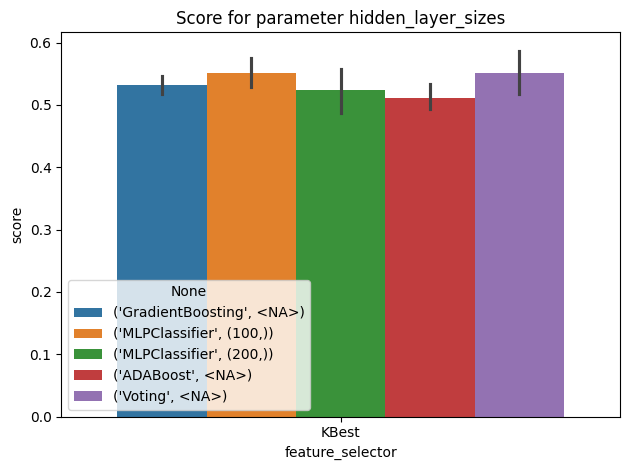

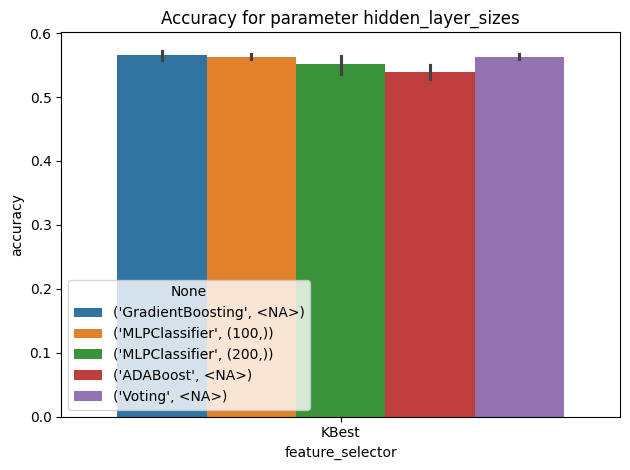

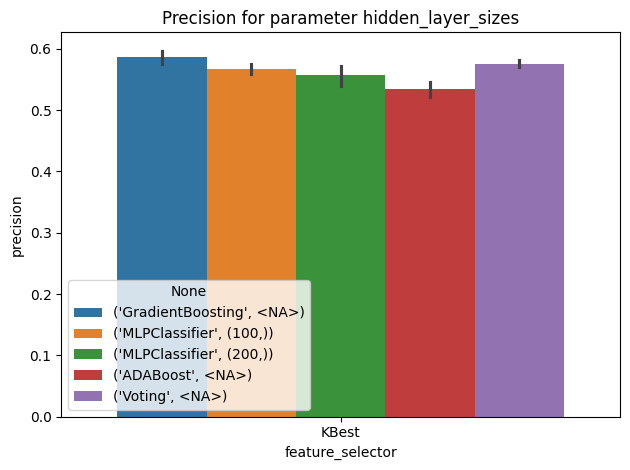

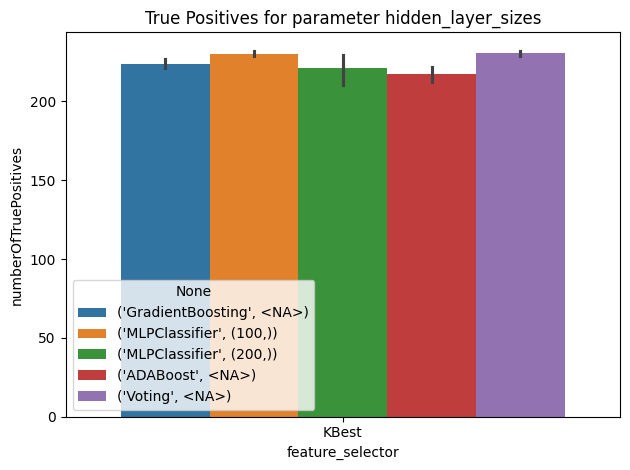

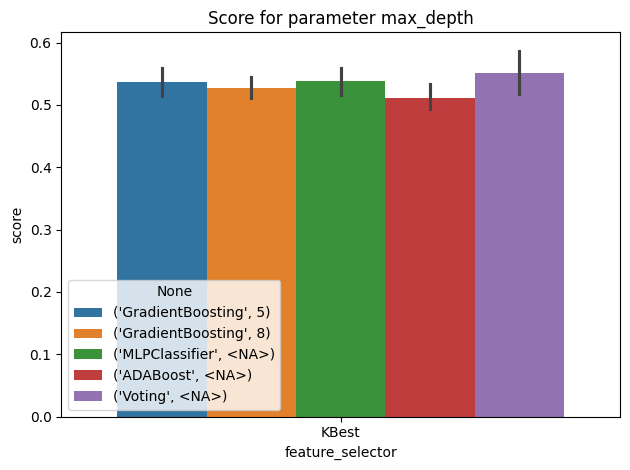

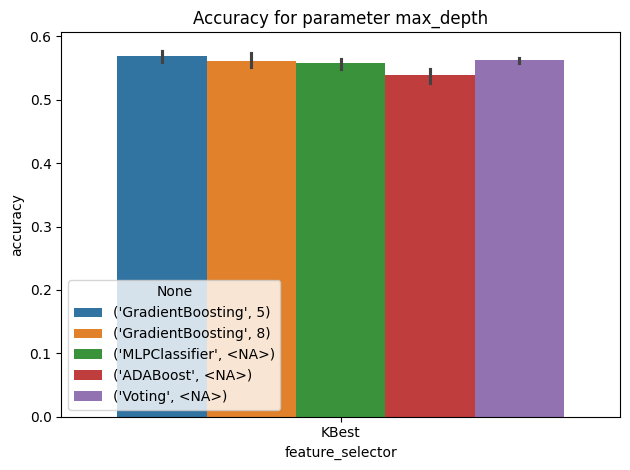

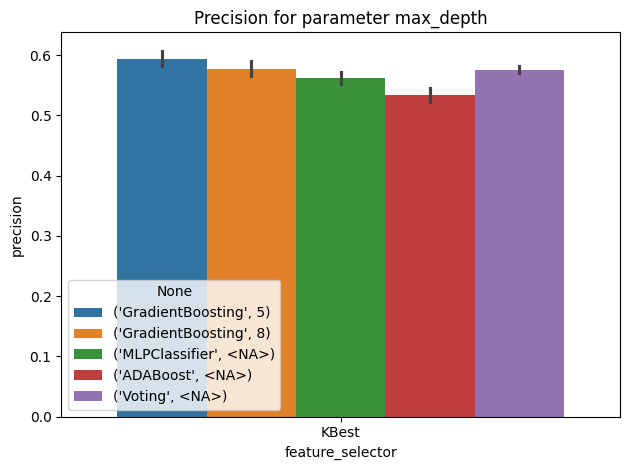

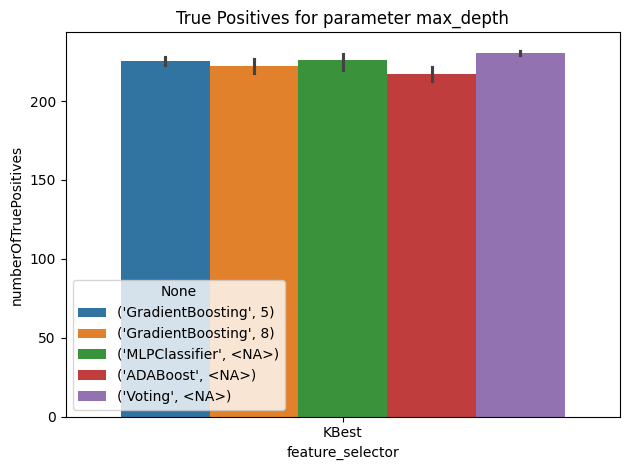

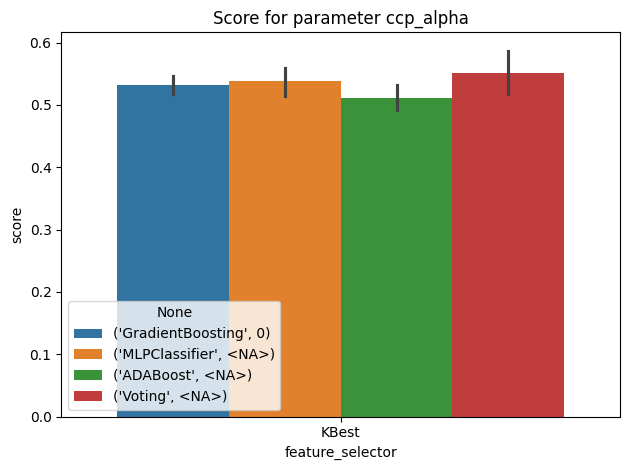

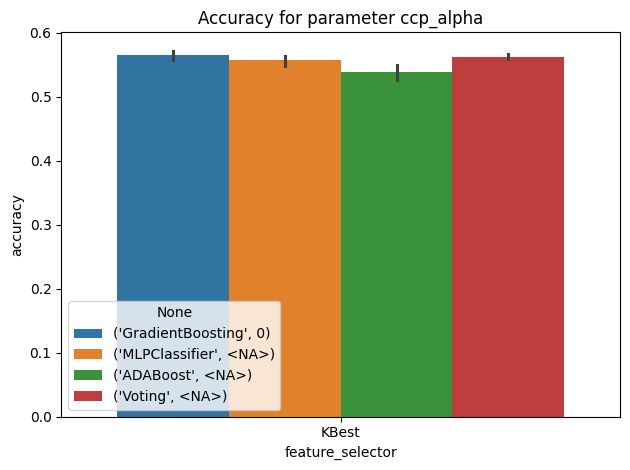

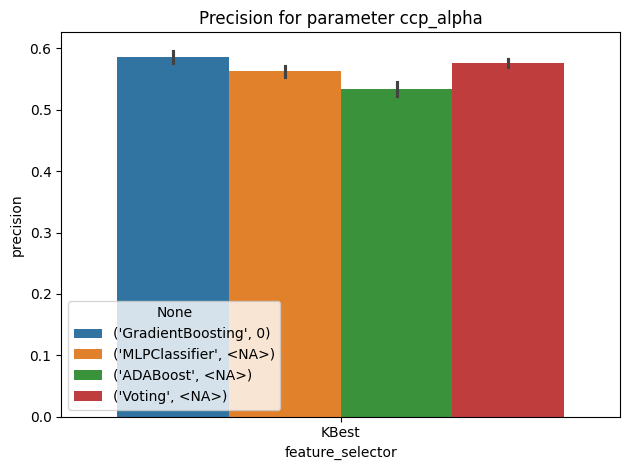

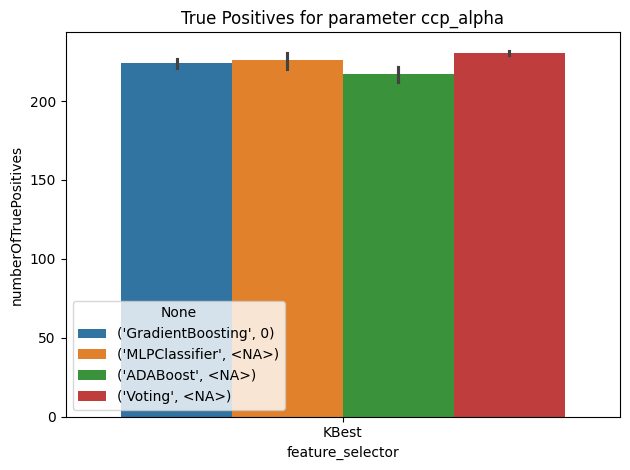

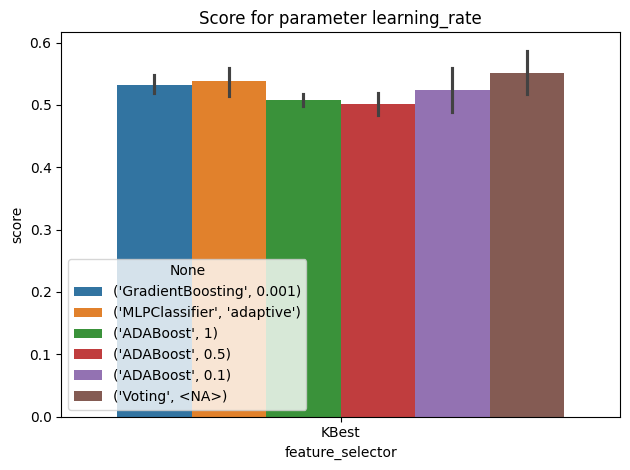

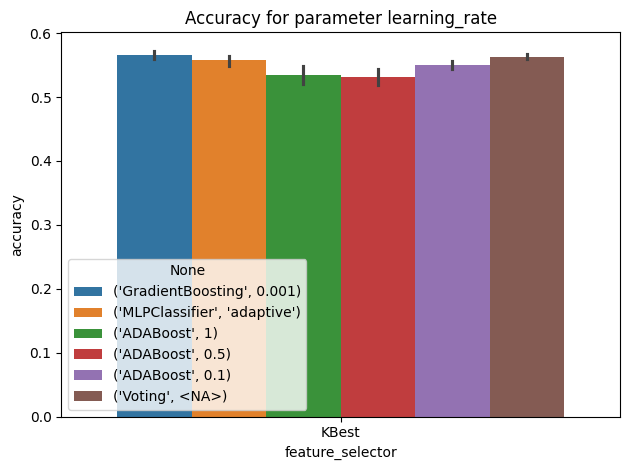

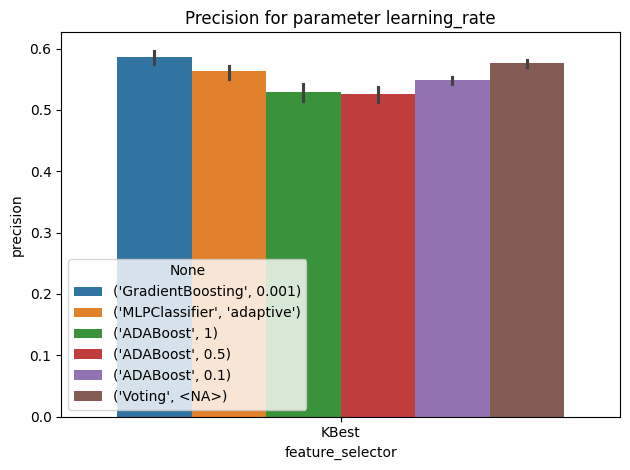

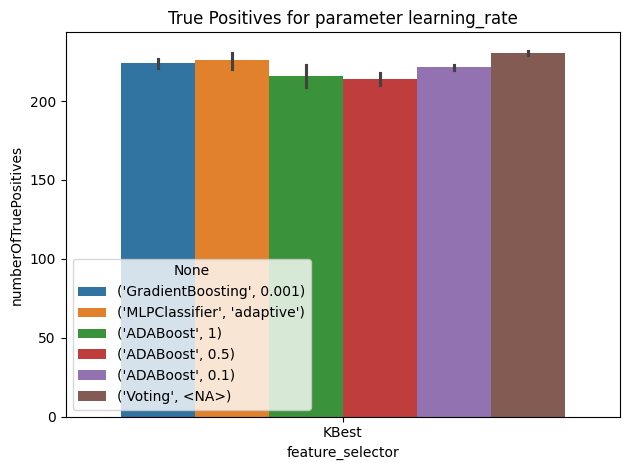

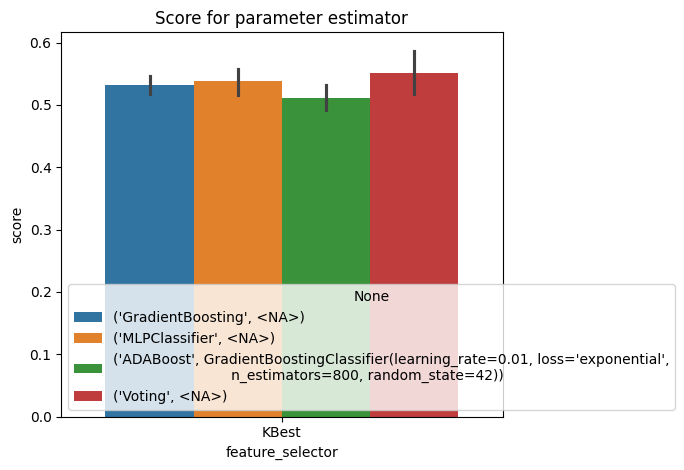

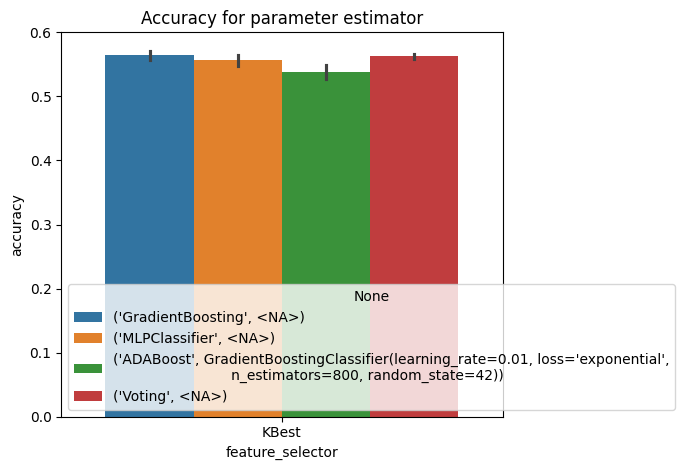

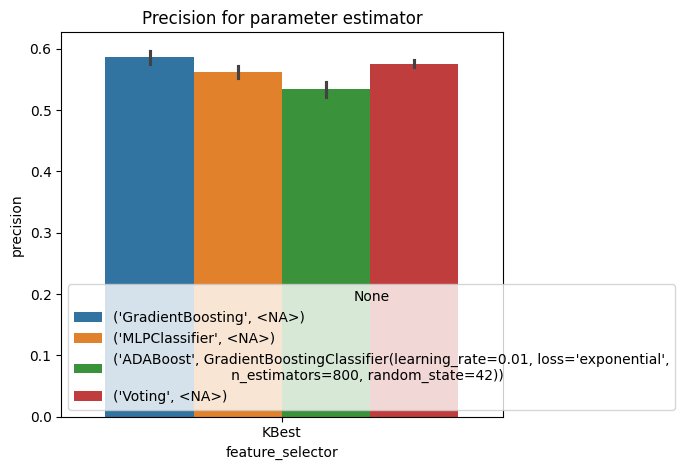

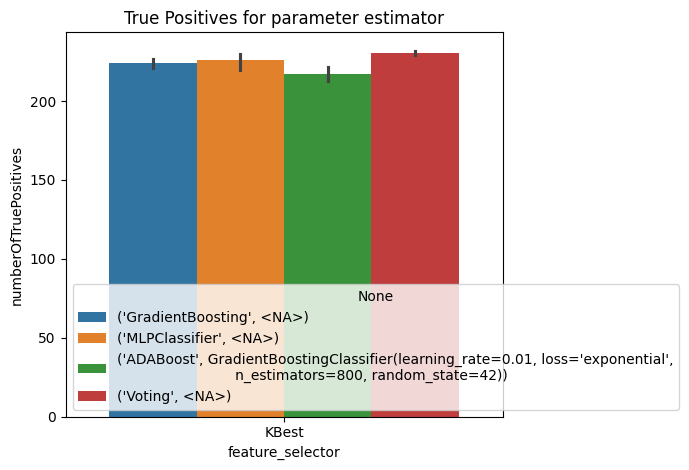

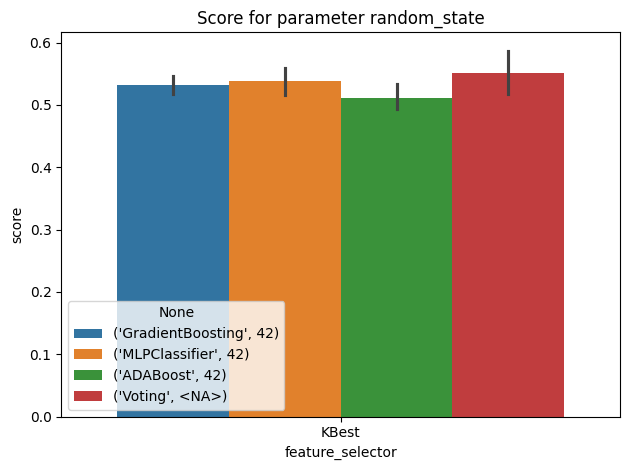

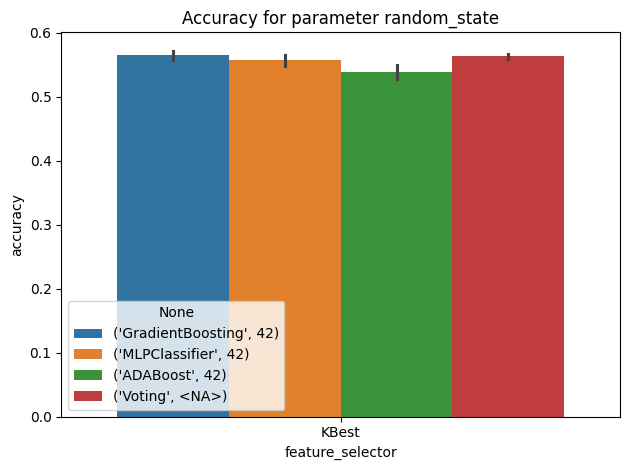

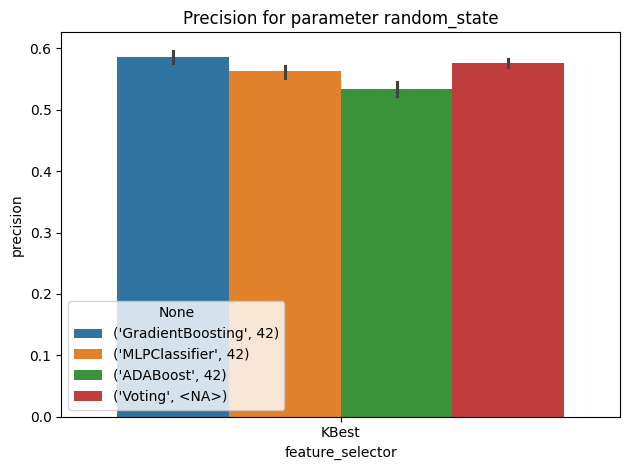

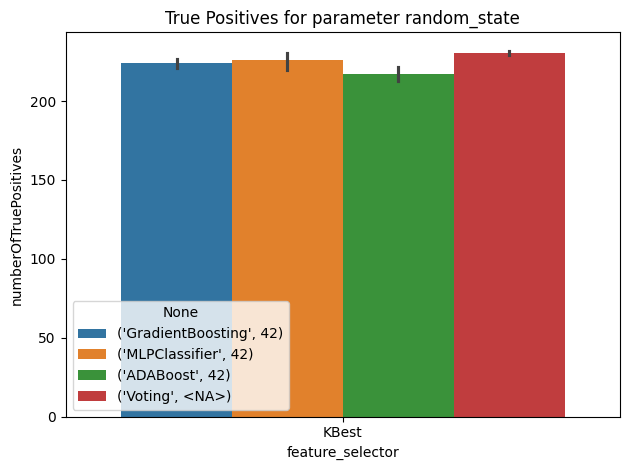

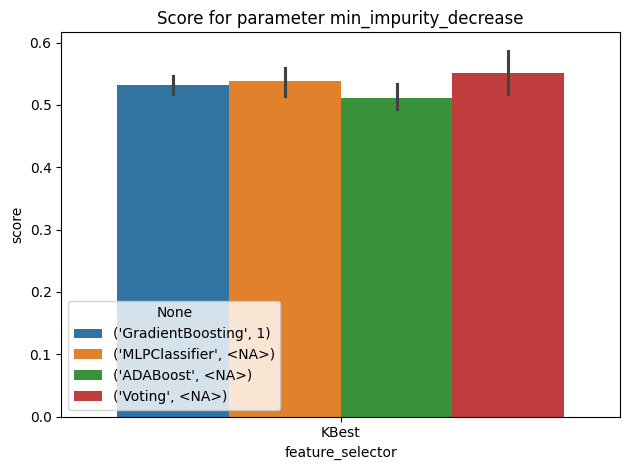

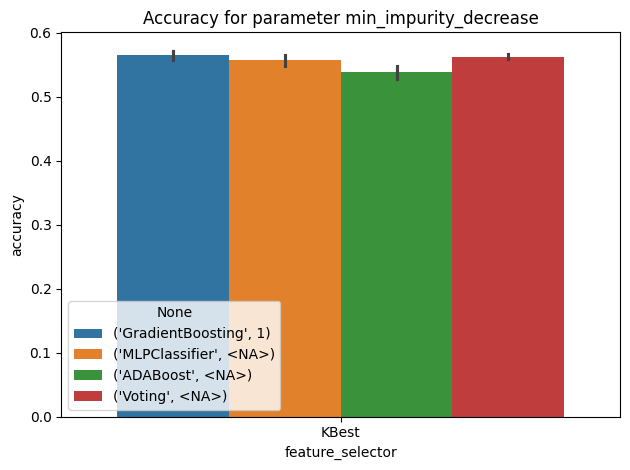

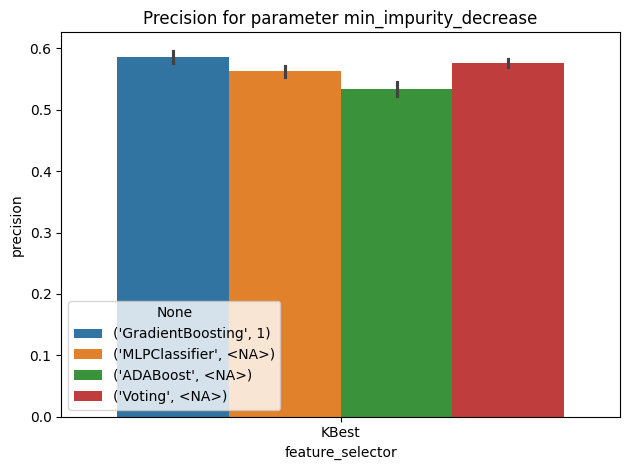

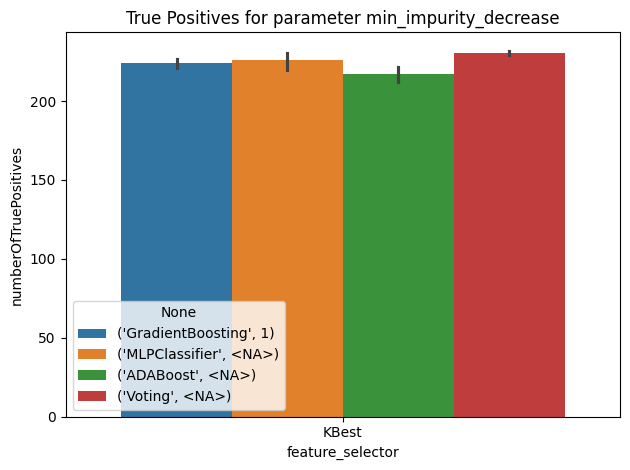

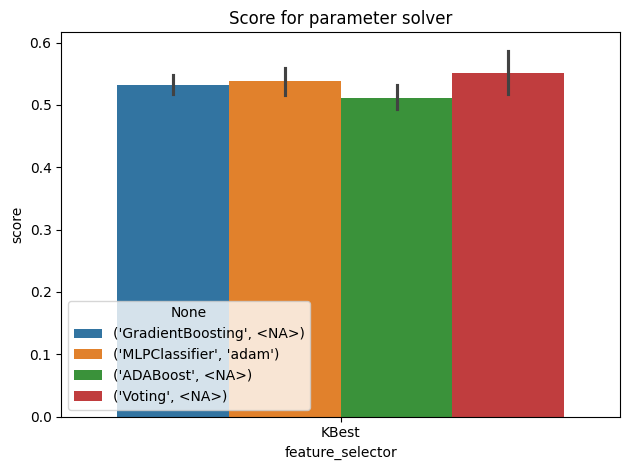

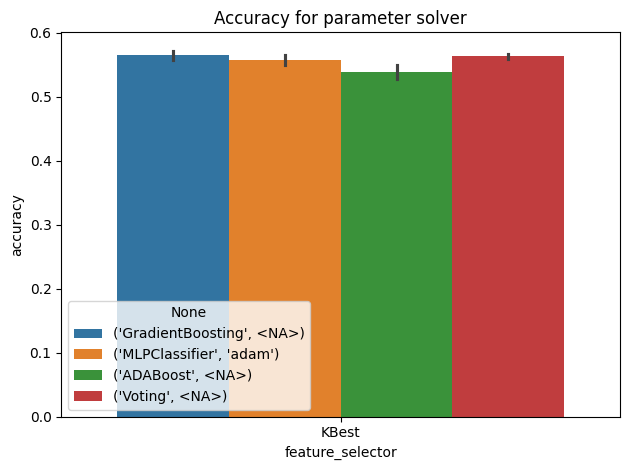

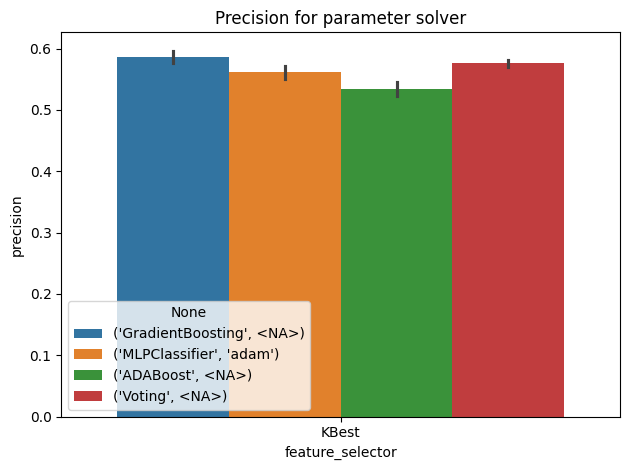

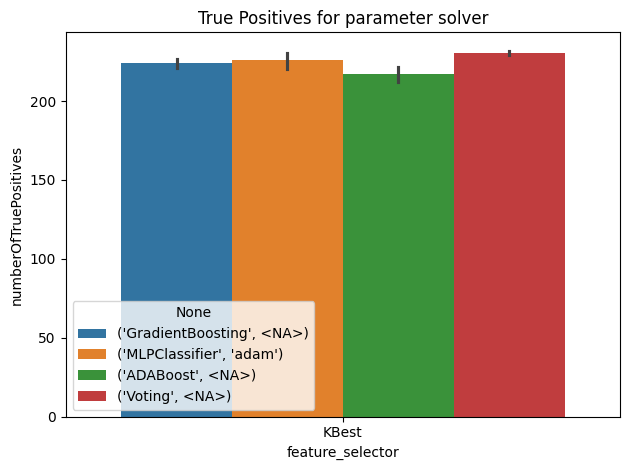

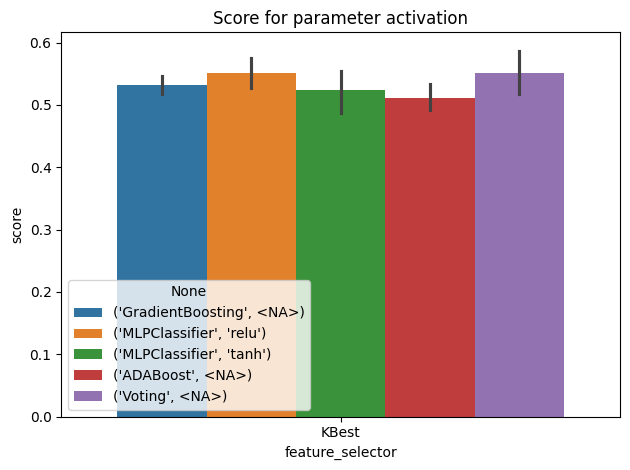

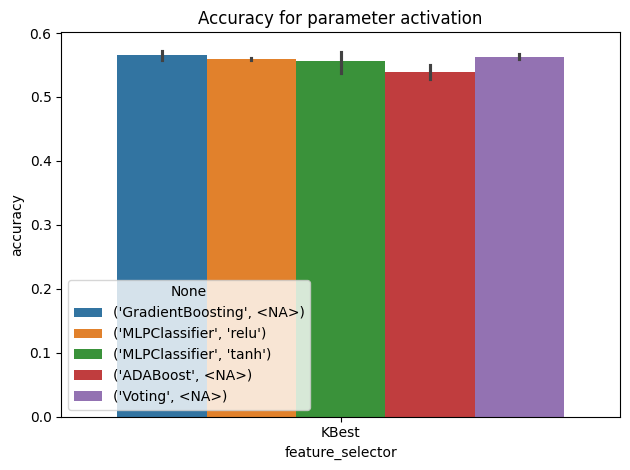

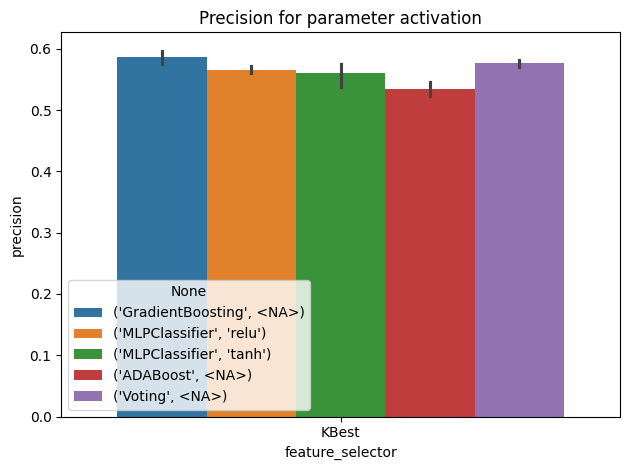

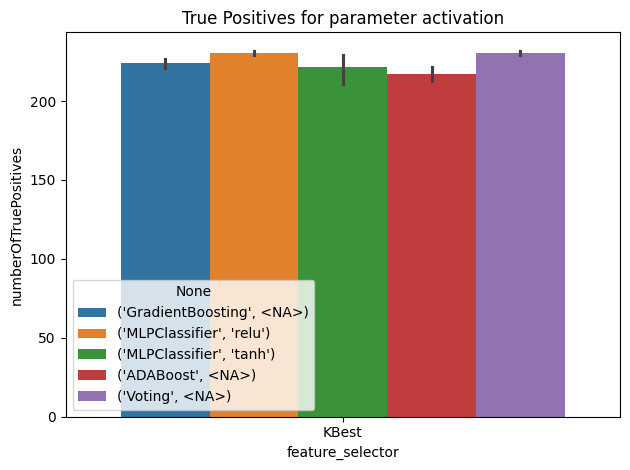

TypeError: unhashable type: 'list'

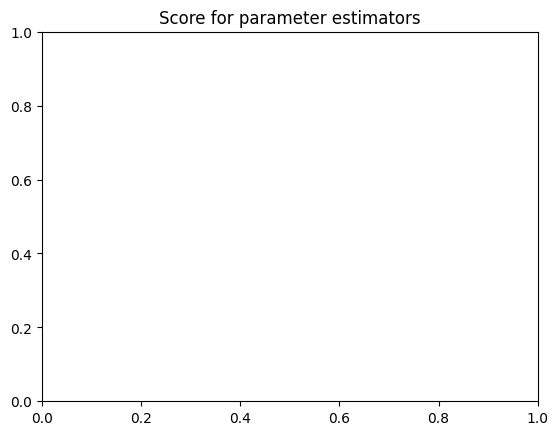

In [ ]:
%%time
processedResultsDf, parameters = functions.extractParameterResultsArr(
    resultsDf,
    [models, featureSelectors, scalers, featureGenerators],
    [
        "model_parameters",
        "selector_parameters",
        "scaler_parameters",
        "feature_generator_parameters",
    ],
)
functions.drawParameterResultsBarplot(processedResultsDf, parameters)

### Score/Accuracy by number of features

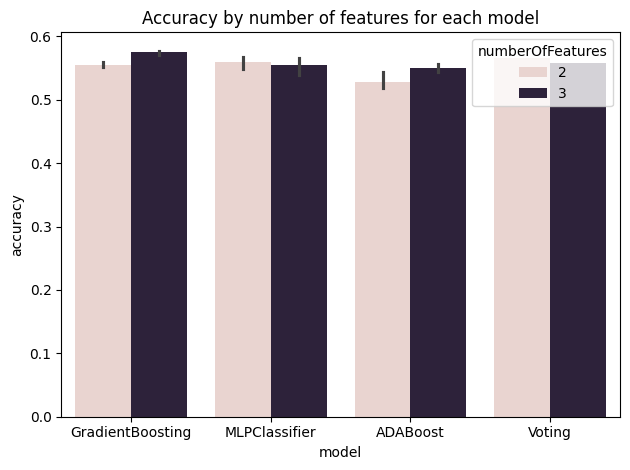

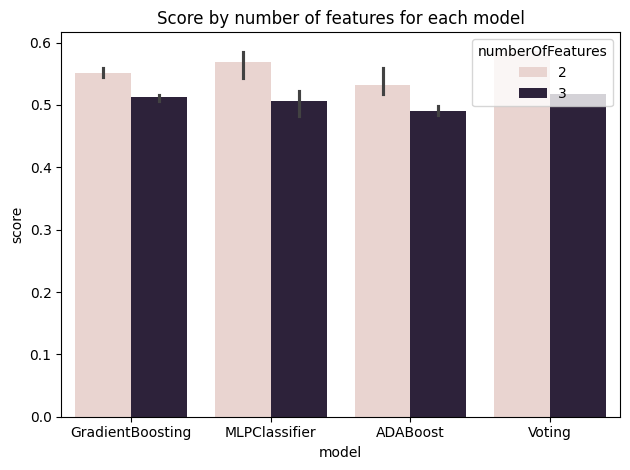

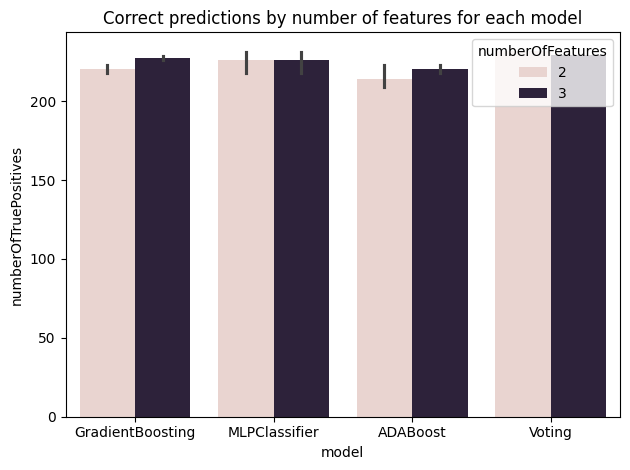

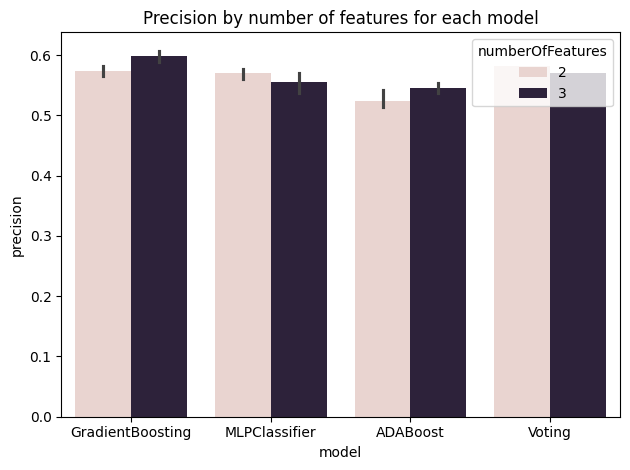

In [ ]:
functions.drawResultsPerNumberOfFeatures(processedResultsDf)

### Final Results for Feature Selectors

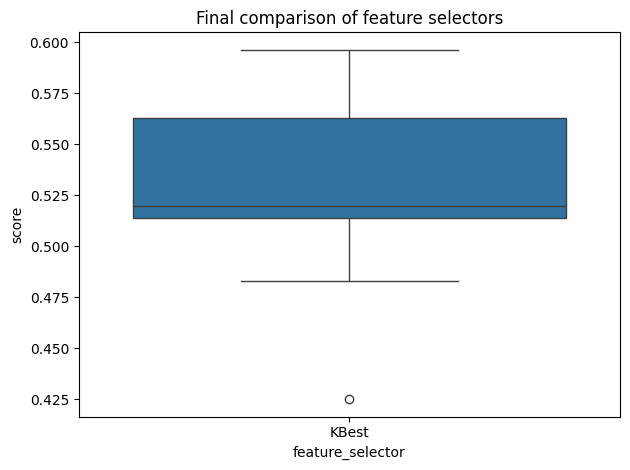

In [ ]:
plt.title("Final comparison of feature selectors")
sns.boxplot(data=processedResultsDf, x="feature_selector", y="score")

plt.tight_layout()
plt.show()

<Axes: xlabel='model', ylabel='score'>

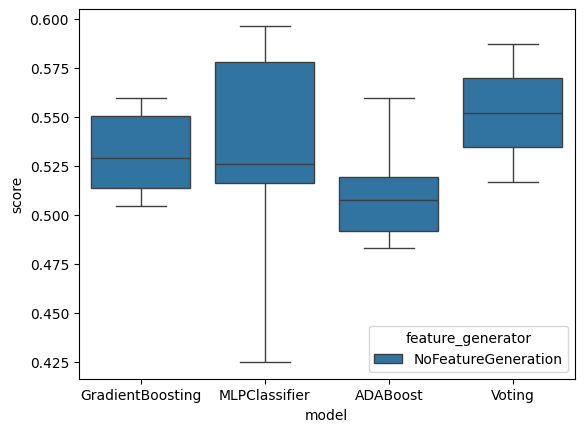

In [ ]:
sns.boxplot(data=processedResultsDf,x="model",y="score",hue="feature_generator")

<Axes: xlabel='model', ylabel='score'>

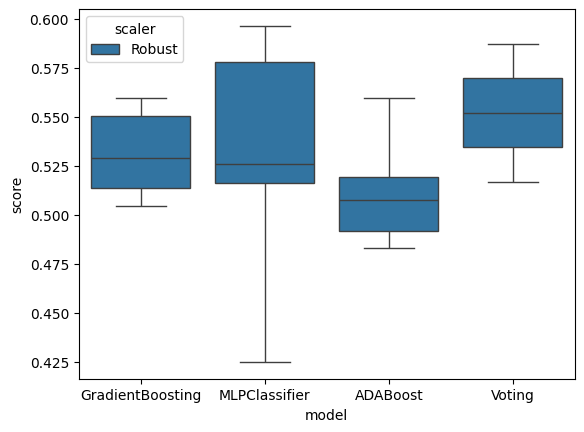

In [ ]:
sns.boxplot(data=processedResultsDf,x="model",y="score",hue="scaler")

### Final Results for Models

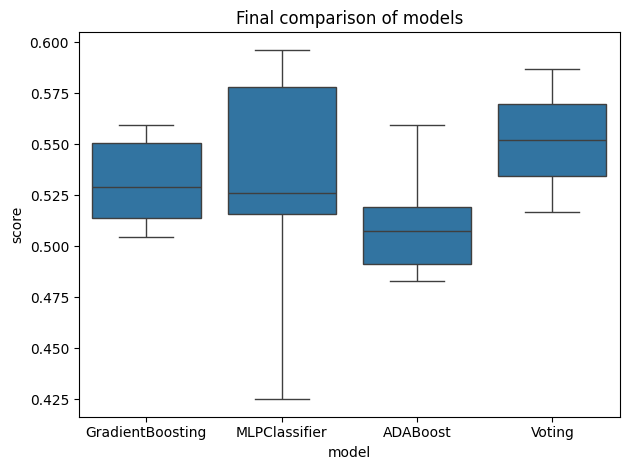

In [ ]:
plt.title("Final comparison of models")
sns.boxplot(data=processedResultsDf, x="model", y="score")
plt.tight_layout()
plt.show()

### Final Results

In [ ]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
processedResultsDf[processedResultsDf["scaler"]==functions.Scaler.NoScaling.name].sort_values(by="score",ascending=False).head(5)

,score,numberOfTruePositives,accuracy,precision,numberOfFeatures,model,model_parameters,feature_selector,selector_parameters,scaler,...,model_parameters_min_samples_split,model_parameters_max_iter,model_parameters_min_samples_leaf,model_parameters_learning_rate_init,model_parameters_voting,model_parameters_loss,model_parameters_n_estimators,model_parameters_alpha,selector_parameters_k,selector_parameters_score_func


In [ ]:
filteredDf['scaler']

6    Robust
Name: scaler, dtype: object

In [ ]:
filteredDf['model_parameters'].to_numpy()

array([{'activation': 'relu', 'solver': 'adam', 'alpha': 0.01, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100,), 'max_iter': 1600, 'random_state': 42}],
      dtype=object)

In [ ]:
filteredDf['feature_generator']

6    NoFeatureGeneration
Name: feature_generator, dtype: object

In [ ]:
filteredDf

,score,numberOfTruePositives,accuracy,precision,numberOfFeatures,model,model_parameters,feature_selector,selector_parameters,scaler,...,model_parameters_min_samples_split,model_parameters_max_iter,model_parameters_min_samples_leaf,model_parameters_learning_rate_init,model_parameters_voting,model_parameters_loss,model_parameters_n_estimators,model_parameters_alpha,selector_parameters_k,selector_parameters_score_func
6,0.59633,235,0.559394,0.563845,2,MLPClassifier,"{'activation': 'relu', 'solver': 'adam', 'alph...",KBest,{'score_func': <function mutual_info_classif a...,Robust,...,<NA>,1600,<NA>,0.001,<NA>,<NA>,<NA>,0.01,2,mutual_info_classif


In [ ]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 2 ms


In [ ]:
processedResultsDf[processedResultsDf["scaler"]==functions.Scaler.NoScaling.name].sort_values(by="score",ascending=False).head(5)

,score,numberOfTruePositives,accuracy,precision,numberOfFeatures,model,model_parameters,feature_selector,selector_parameters,scaler,...,model_parameters_min_samples_split,model_parameters_max_iter,model_parameters_min_samples_leaf,model_parameters_learning_rate_init,model_parameters_voting,model_parameters_loss,model_parameters_n_estimators,model_parameters_alpha,selector_parameters_k,selector_parameters_score_func


In [ ]:
filteredDf['scaler']

6    Robust
Name: scaler, dtype: object

In [ ]:
filteredDf['model_parameters'].to_numpy()

array([{'activation': 'relu', 'solver': 'adam', 'alpha': 0.01, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100,), 'max_iter': 1600, 'random_state': 42}],
      dtype=object)

In [ ]:
filteredDf['feature_generator']

6    NoFeatureGeneration
Name: feature_generator, dtype: object

In [ ]:
filteredDf

,score,numberOfTruePositives,accuracy,precision,numberOfFeatures,model,model_parameters,feature_selector,selector_parameters,scaler,...,model_parameters_min_samples_split,model_parameters_max_iter,model_parameters_min_samples_leaf,model_parameters_learning_rate_init,model_parameters_voting,model_parameters_loss,model_parameters_n_estimators,model_parameters_alpha,selector_parameters_k,selector_parameters_score_func
6,0.59633,235,0.559394,0.563845,2,MLPClassifier,"{'activation': 'relu', 'solver': 'adam', 'alph...",KBest,{'score_func': <function mutual_info_classif a...,Robust,...,<NA>,1600,<NA>,0.001,<NA>,<NA>,<NA>,0.01,2,mutual_info_classif
